# import library and dataset


In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
import os 
import PIL 
import tensorflow as tf 

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses =list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

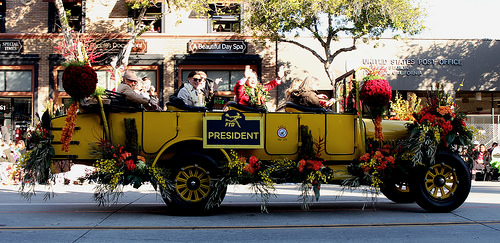

In [7]:
PIL.Image.open(str(roses[0]))

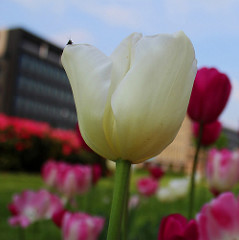

In [8]:


tulips =list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [9]:
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    
}

In [10]:
flowers_images_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/14167534527_781ceb1b7a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5512287917_9f5d3f0f98_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/476857510_d2b30175de_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/521762040_f26f2e08dd.jpg'),
 PosixPath('datasets/flower_photos/daisy/7320089276_87b544e341.jpg'),
 PosixPath('datasets/flower_photos/daisy/8008258043_5457dd254b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/721595842_bacd80a6ac.jpg'),
 PosixPath('datasets/flower_photos/daisy/8719756744_34a5a83976_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5110107234_12ddc0206b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/20773528301_008fcbc5a1_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/144076848_57e1d662e3_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/510844526_858b8fe4db.jpg'),
 PosixPath('datasets/flower_photos/daisy/5632774792_0fa33d17eb_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/12891819633_e4c82b51e8.jpg'),
 Pos

In [11]:
flowers_labels_dict ={
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(243, 500, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X,y =[],[]
for flower_name,images in flowers_images_dict.items():
   for image in images:
       img = cv2.imread(str(image))
       resized_img = cv2.resize(img,(180,180))
       X.append(resized_img)
       y.append(flowers_labels_dict[flower_name])

In [16]:
X = np.array(X)
y=np.array(y)

In [17]:
len(y)

3670

In [18]:
X.shape

(3670, 180, 180, 3)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [20]:
len(X_train)

2752

In [21]:
len(X_test)

918

In [22]:
X_train_scaled =X_train/255
X_test_scaled = X_test/255


In [23]:
num_classes = 5


model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
    
    
])


model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 294ms/step - accuracy: 0.3276 - loss: 1.6427
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 304ms/step - accuracy: 0.5809 - loss: 1.0563
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 300ms/step - accuracy: 0.6692 - loss: 0.8485
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 301ms/step - accuracy: 0.7716 - loss: 0.6404
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 304ms/step - accuracy: 0.8551 - loss: 0.4316
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 308ms/step - accuracy: 0.9112 - loss: 0.2573
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 303ms/step - accuracy: 0.9755 - loss: 0.1062
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 300ms/step - accuracy: 0.9775 - loss: 0.0934
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 299ms/step - accuracy: 0.9887 - loss: 0.0452
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 315ms/step - accuracy: 0.9943 - loss: 0.0285
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 297ms/step - accuracy: 0.9823 - loss: 0.0793
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 26

In [24]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.6602 - loss: 3.0068


[3.2537710666656494, 0.6492374539375305]

In [25]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step


array([[ -0.36149752,  11.548046  ,   3.5736983 , -16.278479  ,
        -10.526202  ],
       [ 10.044488  ,  -2.9098566 , -13.903675  , -11.18921   ,
         -1.9012326 ],
       [ -2.3775153 ,  -9.824776  ,  18.2257    ,  -4.542081  ,
        -13.1643915 ],
       ...,
       [-16.214949  ,  -6.220827  ,   9.531763  ,  15.004853  ,
         -4.8216057 ],
       [  7.013252  ,  -1.3197354 ,  -6.1606407 , -10.709731  ,
         -2.0449665 ],
       [-17.21575   , -21.37647   ,  -1.6500092 ,  28.613047  ,
        -10.565174  ]], dtype=float32)

In [26]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([6.7235469e-06, 9.9964929e-01, 3.4405850e-04, 8.2213191e-13,
       2.5889463e-10], dtype=float32)>

In [27]:
np.argmax(score)

1

In [28]:
y_test[0]

1

In [29]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

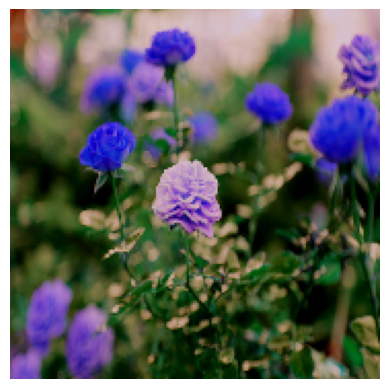

In [30]:
plt.axis('off')
plt.imshow(X[1])

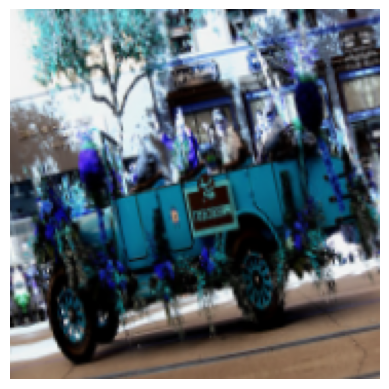

In [31]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [32]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=50)    

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 45s 512ms/step - accuracy: 0.2776 - loss: 1.9106
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 390ms/step - accuracy: 0.5137 - loss: 1.1267
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 363ms/step - accuracy: 0.5928 - loss: 0.9832
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 370ms/step - accuracy: 0.6428 - loss: 0.9416
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 388ms/step - accuracy: 0.6706 - loss: 0.8520
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 365ms/step - accuracy: 0.6737 - loss: 0.8614
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 383ms/step - accuracy: 0.6942 - loss: 0.8173
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 392ms/step - accuracy: 0.7376 - loss: 0.7253
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 395ms/step - accuracy: 0.7069 - loss: 0.7548
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 367ms/step - accuracy: 0.7346 - loss: 0.6867
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 384ms/step - accuracy: 0.7600 - loss: 0.6346
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 32

In [33]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7176 - loss: 1.1800


[1.2887030839920044, 0.727668821811676]